## CIND820 D1H - Big Data Analytics Project, F2023   
### Final Coding  


###  Name: Irfan Ahmad 
###  SN: 501 231 340 

*****
The coding of this project is done in two parts: 

The first part uses simple regression to estimate gradient of total electric vehicle registration in each of Ontario's forward sortation area. The dataset comes from the Government of Ontario's quarterly reports on cumulative electric vehicle registrations grouped by forward sortation area. 

The second part uses three prediction models (Multiple Regression, Logistic Regression, K-Nearest Neighbour) to estimate the same gradient based on economic factors obtained from the statistics provided by Revenue Canada. The dataset coming from Revenue Canada is also grouped by forward sortation areas.
*****

### Preparation

The dataset includes cumulative EV Registration Count and Income Amount per source from Ontario's each forward sortation area. For more info: https://github.com/iresearch23/cind820

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sb 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing

### Part 1: Determine gradient for EV registration count

#### Data Load and Clean-up: 

Read the csv file from the local machine containing quarterly cumulative counts of EV registraions in each of Ontario's forward sortation area. This file can also be accessed via GitHub: https://github.com/iresearch23/cind820/blob/main/Ontario_EVs_CumulativeCount.csv.csv 




In [3]:
dfEVRegistration = pd.read_csv('C:\Tmu\CIND820\Ontario_EVs_CumulativeCount.csv', encoding='utf-8') 
print(dfEVRegistration.shape)
dfEVRegistration.head(5)

(569, 8)


,FSA,EV2022Q1,EV2022Q2,EV2022Q3,EV2022Q4,EV2023Q1,EV2023Q2,EV2023Q3
0,K0A,645.0,745.0,871.0,928.0,987.0,1088.0,1195.0
1,K0B,95.0,103.0,107.0,118.0,119.0,131.0,145.0
2,K0C,167.0,193.0,215.0,234.0,242.0,269.0,302.0
3,K0E,128.0,140.0,155.0,162.0,173.0,182.0,208.0
4,K0G,197.0,223.0,254.0,272.0,294.0,326.0,352.0


Check for missing values: 

In [4]:
dfEVRegistration.isna().sum()

FSA          0
EV2022Q1    28
EV2022Q2    26
EV2022Q3    22
EV2022Q4    20
EV2023Q1    19
EV2023Q2    11
EV2023Q3     6
dtype: int64

Replace missing values with 0: 

In [5]:
dfEVRegistration["EV2022Q1"].fillna(0, inplace = True) 
dfEVRegistration["EV2022Q2"].fillna(0, inplace = True) 
dfEVRegistration["EV2022Q3"].fillna(0, inplace = True) 
dfEVRegistration["EV2022Q4"].fillna(0, inplace = True) 
dfEVRegistration["EV2023Q1"].fillna(0, inplace = True) 
dfEVRegistration["EV2023Q2"].fillna(0, inplace = True) 
dfEVRegistration["EV2023Q3"].fillna(0, inplace = True) 

Check to make sure missing values are gone:

In [6]:
dfEVRegistration.isna().sum()

FSA         0
EV2022Q1    0
EV2022Q2    0
EV2022Q3    0
EV2022Q4    0
EV2023Q1    0
EV2023Q2    0
EV2023Q3    0
dtype: int64

Add columns 'Yintercept' and 'Gradient with default values of zero to the dataframe 

In [7]:
dfEVRegistration['Yintercept'] = 0 
dfEVRegistration['Gradient']   = 0 
dfEVRegistration.head(5)

,FSA,EV2022Q1,EV2022Q2,EV2022Q3,EV2022Q4,EV2023Q1,EV2023Q2,EV2023Q3,Yintercept,Gradient
0,K0A,645.0,745.0,871.0,928.0,987.0,1088.0,1195.0,0,0
1,K0B,95.0,103.0,107.0,118.0,119.0,131.0,145.0,0,0
2,K0C,167.0,193.0,215.0,234.0,242.0,269.0,302.0,0,0
3,K0E,128.0,140.0,155.0,162.0,173.0,182.0,208.0,0,0
4,K0G,197.0,223.0,254.0,272.0,294.0,326.0,352.0,0,0


#### Determine gradient for EV registration count:

For each row in dfEVRegistration, estimate the gradient and y-intercept using simple regression:

   FSA  EV2022Q1  EV2022Q2  EV2022Q3  EV2022Q4  EV2023Q1  EV2023Q2  EV2023Q3  \
0  K0A     645.0     745.0     871.0     928.0     987.0    1088.0    1195.0   
1  K0B      95.0     103.0     107.0     118.0     119.0     131.0     145.0   
2  K0C     167.0     193.0     215.0     234.0     242.0     269.0     302.0   
3  K0E     128.0     140.0     155.0     162.0     173.0     182.0     208.0   
4  K0G     197.0     223.0     254.0     272.0     294.0     326.0     352.0   

   Yintercept    Gradient  
0   87.571429  660.000000  
1    7.785714   93.500000  
2   20.857143  169.142857  
3   12.214286  127.357143  
4   25.392857  197.821429  


EV Registrations = [ 95. 103. 107. 118. 119. 131. 145.]  
Coefficients = [93.5         7.78571429]


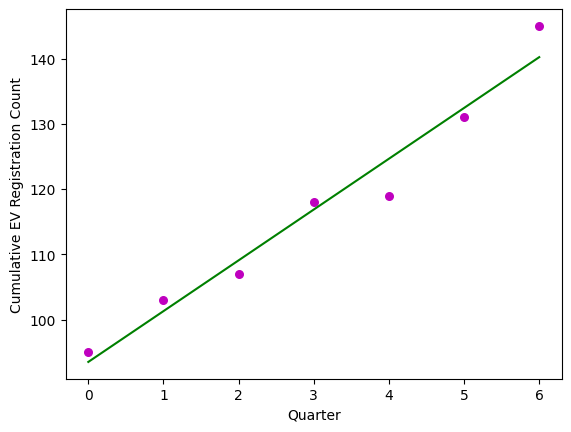



EV Registrations = [128. 140. 155. 162. 173. 182. 208.]  
Coefficients = [127.35714286  12.21428571]


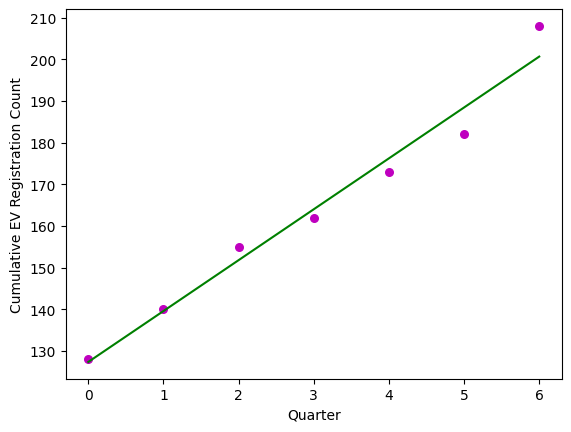



EV Registrations = [22. 25. 30. 34. 34. 41. 45.]  
Coefficients = [21.75  3.75]


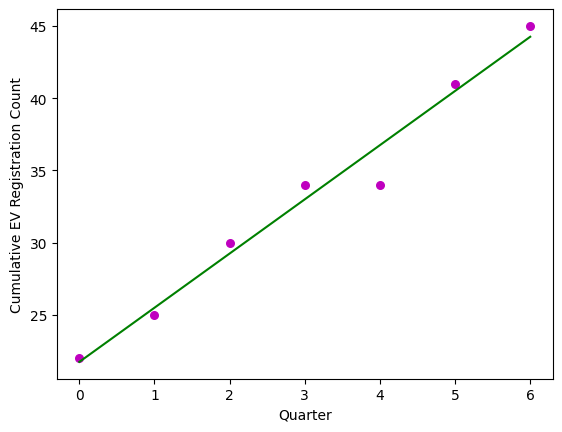



EV Registrations = [ 682.  765.  895. 1019. 1097. 1205. 1335.]  
Coefficients = [673.89285714 108.60714286]


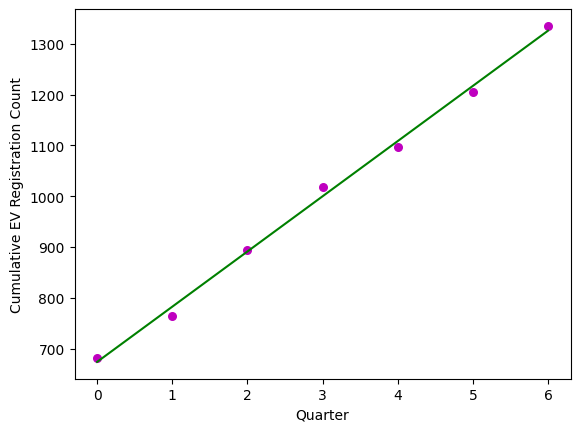



EV Registrations = [45. 50. 52. 55. 63. 68. 78.]  
Coefficients = [43.07142857  5.21428571]


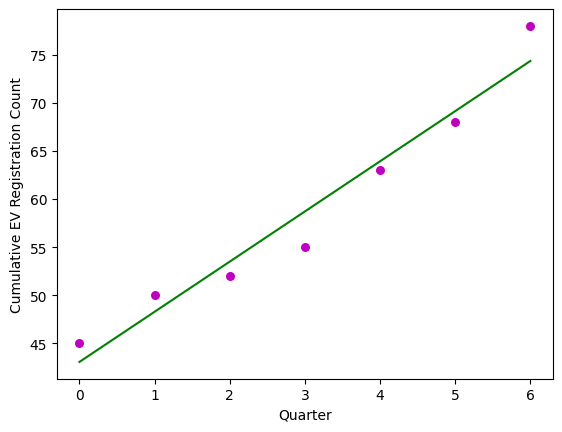

In [8]:
def estimateRegCoeff(x, y):
    
    # number of records:
    n = np.size(x)
 
    # mean of x and y vector
    mean_x = np.mean(x)
    mean_y = np.mean(y)
 
    # cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*mean_y*mean_x
    SS_xx = np.sum(x*x) - n*mean_x*mean_x
 
    # slope and y-intercept
    slope       = SS_xy / SS_xx
    y_intercept = mean_y - slope*mean_x
 
    return (y_intercept, slope) 


def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('Quarter')
    plt.ylabel('Cumulative EV Registration Count')
 
    # Show the plot
    plt.show()
    
 
def main(): 
        
    # 7 observations - 4 quarters in 2022, 3 quarters in 2023
    x = np.array([0,1,2,3,4,5,6]) 
    
    nRecords = len(dfEVRegistration) 
    
    for i in range(nRecords):
         
        y = np.array([])
        # appending to the array 
        evCell = dfEVRegistration['EV2022Q1'].values[i]
        y = np.append(y, [evCell])
        evCell = dfEVRegistration['EV2022Q2'].values[i]
        y = np.append(y, [evCell]) 
        evCell = dfEVRegistration['EV2022Q3'].values[i]
        y = np.append(y, [evCell]) 
        evCell = dfEVRegistration['EV2022Q4'].values[i]
        y = np.append(y, [evCell])
        evCell = dfEVRegistration['EV2023Q1'].values[i]
        y = np.append(y, [evCell])
        evCell = dfEVRegistration['EV2023Q2'].values[i]
        y = np.append(y, [evCell]) 
        evCell = dfEVRegistration['EV2023Q3'].values[i]
        y = np.append(y, [evCell]) 

        #print(y)
        # estimate simple regression coefficients
        b = estimateRegCoeff(x, y)
        #print("Estimated coefficients:\nintercept = {}  \nslope = {}".format(b[0], b[1])) 
        
        dfEVRegistration.loc[i,['Gradient','Yintercept']] = [b[0],b[1]] 
    
    print(dfEVRegistration.head(5))
 
    # See few plots of regression line 
    for i in (1,3,70,200, 450): 
        y = np.array([]) 
        b = np.array([])
        
        # appending registration count to the array 
        evCell = dfEVRegistration['EV2022Q1'].values[i]
        y = np.append(y, [evCell])
        evCell = dfEVRegistration['EV2022Q2'].values[i]
        y = np.append(y, [evCell]) 
        evCell = dfEVRegistration['EV2022Q3'].values[i]
        y = np.append(y, [evCell]) 
        evCell = dfEVRegistration['EV2022Q4'].values[i]
        y = np.append(y, [evCell])
        evCell = dfEVRegistration['EV2023Q1'].values[i]
        y = np.append(y, [evCell])
        evCell = dfEVRegistration['EV2023Q2'].values[i]
        y = np.append(y, [evCell]) 
        evCell = dfEVRegistration['EV2023Q3'].values[i]
        y = np.append(y, [evCell]) 
        
        #appending regression coefficients
        evCell = dfEVRegistration['Gradient'].values[i]
        b = np.append(b, [evCell])
        evCell = dfEVRegistration['Yintercept'].values[i]
        b = np.append(b, [evCell]) 
        
        print("\n\nEV Registrations = {}  \nCoefficients = {}".format(y, b))
        
        plot_regression_line(x, y, b)
 
if __name__ == "__main__":
    main()

### Part 2: Predict gradient based on Income and Source of Income

##### Data Load and Clean-up:

Read the csv file from the local machine containing personal income per source in each of Ontario's forward sortation area. This file can also be accessed via GitHub: https://github.com/iresearch23/cind820/blob/main/Ontario_WeightedIncome_PerSource.csv 

In [9]:
dfWtdIncomePerSource = pd.read_csv('C:\Tmu\CIND820\Ontario_WeightedIncome_PerSource.csv', encoding='utf-8') 
print(dfWtdIncomePerSource.shape)
dfWtdIncomePerSource.head(5) 

(525, 7)


,FSA,WtdEmploymentIncome,WtdPensionIncome,WtdInvestmentIncome,WtdSelfEmpIncome,WtdBenefitIncome,WtdOtherIncome
0,K0A,1180583638,174107115,67101015,9991241,19249315,41094462
1,K0B,131846461,35705964,12872775,1741128,7779233,5982520
2,K0C,374023803,91756996,25979482,3541081,16401083,15257693
3,K0E,261467549,78028866,15588684,2235807,12750040,14100813
4,K0G,288977631,93333286,18809557,2755332,8808412,15779711


Check for missing values:

In [10]:
dfWtdIncomePerSource.isna().sum()

FSA                    0
WtdEmploymentIncome    0
WtdPensionIncome       0
WtdInvestmentIncome    0
WtdSelfEmpIncome       0
WtdBenefitIncome       0
WtdOtherIncome         0
dtype: int64

Replace null values, if any, with 0:

In [11]:
dfWtdIncomePerSource["WtdEmploymentIncome"].fillna(0, inplace = True) 
dfWtdIncomePerSource["WtdSelfEmpIncome"].fillna(0, inplace = True) 
dfWtdIncomePerSource["WtdPensionIncome"].fillna(0, inplace = True) 
dfWtdIncomePerSource["WtdInvestmentIncome"].fillna(0, inplace = True) 
dfWtdIncomePerSource["WtdBenefitIncome"].fillna(0, inplace = True) 
dfWtdIncomePerSource["WtdOtherIncome"].fillna(0, inplace = True) 

Check to make sure missing values are gone:

In [12]:
dfWtdIncomePerSource.isna().sum()

FSA                    0
WtdEmploymentIncome    0
WtdPensionIncome       0
WtdInvestmentIncome    0
WtdSelfEmpIncome       0
WtdBenefitIncome       0
WtdOtherIncome         0
dtype: int64

Check correlation:

In [13]:
dfWtdIncomePerSource.drop('FSA', axis=1).corr()

,WtdEmploymentIncome,WtdPensionIncome,WtdInvestmentIncome,WtdSelfEmpIncome,WtdBenefitIncome,WtdOtherIncome
WtdEmploymentIncome,1.000000,0.336690,0.464325,0.693096,0.477752,0.874617
WtdPensionIncome,0.336690,1.000000,0.230955,0.276162,0.338046,0.378981
WtdInvestmentIncome,0.464325,0.230955,1.000000,0.795886,-0.063307,0.519549
WtdSelfEmpIncome,0.693096,0.276162,0.795886,1.000000,0.179042,0.693825
WtdBenefitIncome,0.477752,0.338046,-0.063307,0.179042,1.000000,0.622184
WtdOtherIncome,0.874617,0.378981,0.519549,0.693825,0.622184,1.000000


Plot correlation heatmap:

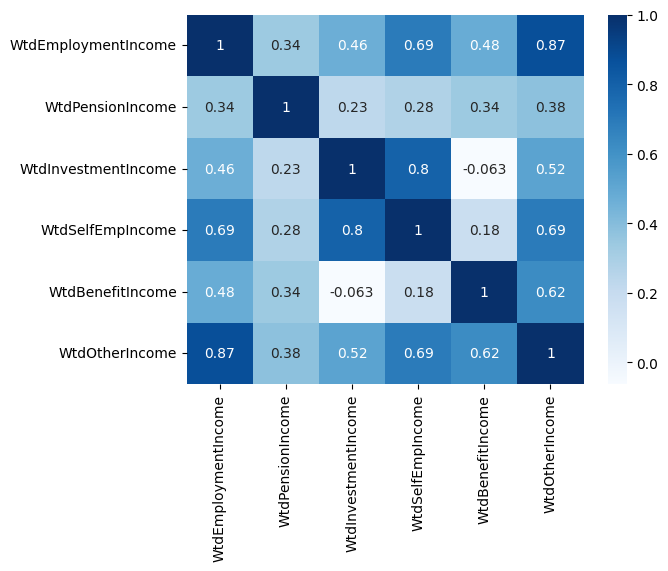

In [14]:
dataplot = sb.heatmap(dfWtdIncomePerSource.drop('FSA', axis=1).corr(), cmap="Blues", annot=True) 
plt.show() 

Drop one attribute from pair of attributes with correlation >= 0.7

In [15]:
del dfWtdIncomePerSource['WtdOtherIncome'] 
del dfWtdIncomePerSource['WtdInvestmentIncome'] 
dfWtdIncomePerSource.head(5) 

,FSA,WtdEmploymentIncome,WtdPensionIncome,WtdSelfEmpIncome,WtdBenefitIncome
0,K0A,1180583638,174107115,9991241,19249315
1,K0B,131846461,35705964,1741128,7779233
2,K0C,374023803,91756996,3541081,16401083
3,K0E,261467549,78028866,2235807,12750040
4,K0G,288977631,93333286,2755332,8808412


Plot correlation heatmap to verify correlation < 0.7

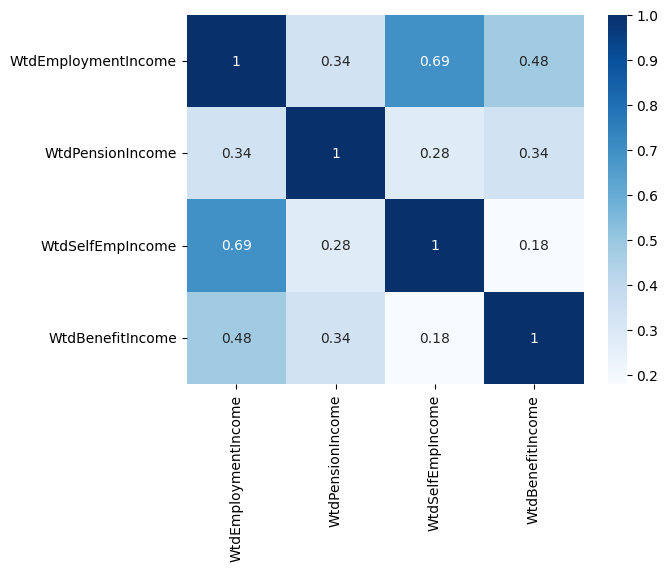

In [16]:
dataplot = sb.heatmap(dfWtdIncomePerSource.drop('FSA', axis=1).corr(), cmap="Blues", annot=True) 
plt.show() 

In [17]:
dfWtdIncomePerSource.describe()

,WtdEmploymentIncome,WtdPensionIncome,WtdSelfEmpIncome,WtdBenefitIncome
count,5.250000e+02,5.250000e+02,5.250000e+02,5.250000e+02
mean,2.395274e+08,2.852788e+07,2.503401e+06,9.058794e+06
std,2.038361e+08,2.608942e+07,2.885245e+06,7.458949e+06
min,1.013330e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.072442e+08,1.219278e+07,6.697590e+05,3.404927e+06
50%,1.868204e+08,2.182338e+07,1.515815e+06,7.779233e+06
75%,3.198277e+08,3.736638e+07,2.981993e+06,1.270416e+07
max,1.330043e+09,2.525722e+08,1.763455e+07,4.220975e+07


In [18]:
print(dfWtdIncomePerSource["WtdPensionIncome"].mean()) 
print(dfWtdIncomePerSource["WtdPensionIncome"].std())

28527880.773333333
26089420.56496223


Remove outliers more than 3 std away:

In [19]:
dfWtdIncomePerSource.shape

(525, 5)

In [20]:
EmploymentIncome_mean = dfWtdIncomePerSource["WtdEmploymentIncome"].mean() 
EmploymentIncome_std  = dfWtdIncomePerSource["WtdEmploymentIncome"].std()  

PensionIncome_mean    = dfWtdIncomePerSource["WtdPensionIncome"].mean() 
PensionIncome_std     = dfWtdIncomePerSource["WtdPensionIncome"].std() 

SelfEmpIncome_mean    = dfWtdIncomePerSource["WtdSelfEmpIncome"].mean() 
SelfEmpIncome_std     = dfWtdIncomePerSource["WtdSelfEmpIncome"].std() 

BenefitIncome_mean    = dfWtdIncomePerSource["WtdBenefitIncome"].mean() 
BenefitIncome_std     = dfWtdIncomePerSource["WtdBenefitIncome"].std() 

dfWtdIncomePerSource = dfWtdIncomePerSource.loc[dfWtdIncomePerSource["WtdEmploymentIncome"] < EmploymentIncome_mean + 3 * EmploymentIncome_std] 
print(dfWtdIncomePerSource.shape) 

dfWtdIncomePerSource = dfWtdIncomePerSource.loc[dfWtdIncomePerSource["WtdPensionIncome"] < PensionIncome_mean + 3 * PensionIncome_std] 
print(dfWtdIncomePerSource.shape) 

dfWtdIncomePerSource = dfWtdIncomePerSource.loc[dfWtdIncomePerSource["WtdSelfEmpIncome"] < SelfEmpIncome_mean + 3 * SelfEmpIncome_std] 
print(dfWtdIncomePerSource.shape) 

dfWtdIncomePerSource = dfWtdIncomePerSource.loc[dfWtdIncomePerSource["WtdBenefitIncome"] < BenefitIncome_mean + 3 * BenefitIncome_std] 
print(dfWtdIncomePerSource.shape) 

(511, 5)
(504, 5)
(494, 5)
(486, 5)


Normalise the numeric attributes:

In [21]:
for column in dfWtdIncomePerSource: 
    if dfWtdIncomePerSource[column].name != 'FSA':
        dfWtdIncomePerSource[column] = (dfWtdIncomePerSource[column] - dfWtdIncomePerSource[column].min())  / (dfWtdIncomePerSource[column].max() - dfWtdIncomePerSource[column].min())
      
dfWtdIncomePerSource.head(5)

,FSA,WtdEmploymentIncome,WtdPensionIncome,WtdSelfEmpIncome,WtdBenefitIncome
1,K0B,0.157169,0.346620,0.160442,0.255584
2,K0C,0.446082,0.890743,0.326305,0.538852
3,K0E,0.311805,0.757475,0.206026,0.418898
4,K0G,0.344624,0.906045,0.253899,0.289397
6,K0J,0.224904,0.840682,0.183582,0.404024


Add column 'EVGradient' with default value of zero to the dataframe:

In [22]:
dfWtdIncomePerSource['EVGradient']   = 0 
dfWtdIncomePerSource.head(5)

,FSA,WtdEmploymentIncome,WtdPensionIncome,WtdSelfEmpIncome,WtdBenefitIncome,EVGradient
1,K0B,0.157169,0.346620,0.160442,0.255584,0
2,K0C,0.446082,0.890743,0.326305,0.538852,0
3,K0E,0.311805,0.757475,0.206026,0.418898,0
4,K0G,0.344624,0.906045,0.253899,0.289397,0
6,K0J,0.224904,0.840682,0.183582,0.404024,0


Populate EVGradient from the Gradient values in dfEVRegistration:

In [23]:
nRecords = len(dfEVRegistration) 
    
for i in range(nRecords): 
        cFSA = dfEVRegistration['FSA'].values[i]
        cFSA = cFSA.strip()
        nGradient = dfEVRegistration['Gradient'].values[i] 
        
        
        dfWtdIncomePerSource.loc[dfWtdIncomePerSource['FSA'].str.contains(cFSA), 'EVGradient'] = nGradient 

dfWtdIncomePerSource.head(5) 


,FSA,WtdEmploymentIncome,WtdPensionIncome,WtdSelfEmpIncome,WtdBenefitIncome,EVGradient
1,K0B,0.157169,0.346620,0.160442,0.255584,93.500000
2,K0C,0.446082,0.890743,0.326305,0.538852,169.142857
3,K0E,0.311805,0.757475,0.206026,0.418898,127.357143
4,K0G,0.344624,0.906045,0.253899,0.289397,197.821429
6,K0J,0.224904,0.840682,0.183582,0.404024,93.357143


Visualize the data using scatter plot:

<Axes: xlabel='WtdEmploymentIncome', ylabel='EVGradient'>

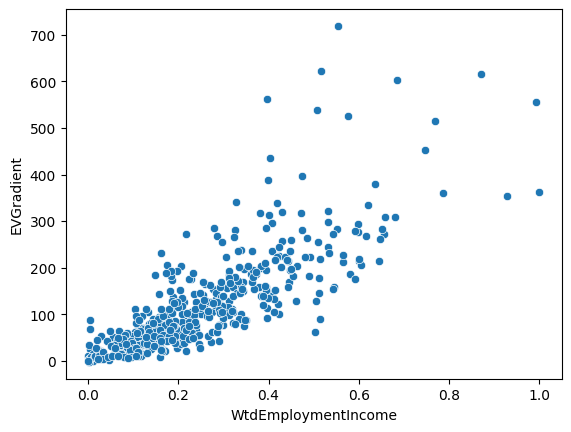

In [24]:
sb.scatterplot(x='WtdEmploymentIncome', 
                y='EVGradient', data=dfWtdIncomePerSource)

<Axes: xlabel='WtdPensionIncome', ylabel='EVGradient'>

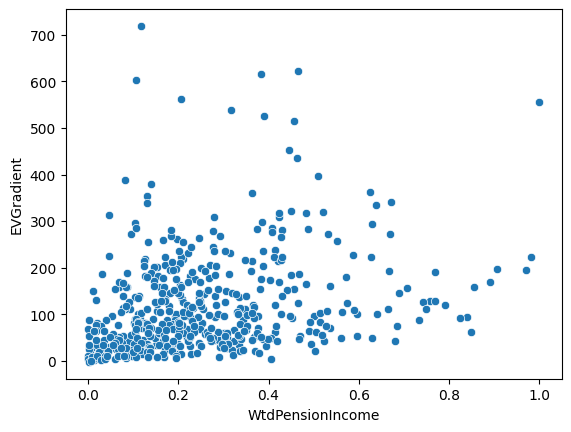

In [25]:
sb.scatterplot(x='WtdPensionIncome', 
                y='EVGradient', data=dfWtdIncomePerSource)

<Axes: xlabel='WtdSelfEmpIncome', ylabel='EVGradient'>

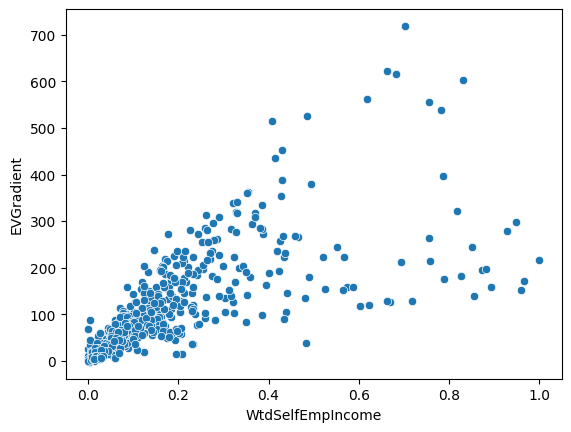

In [26]:
sb.scatterplot(x='WtdSelfEmpIncome', 
                y='EVGradient', data=dfWtdIncomePerSource)

<Axes: xlabel='WtdBenefitIncome', ylabel='EVGradient'>

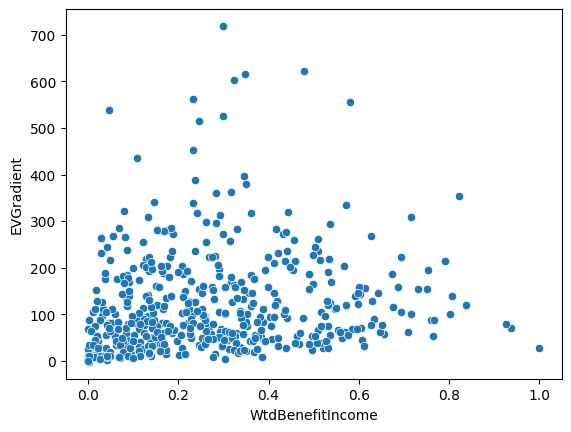

In [27]:
sb.scatterplot(x='WtdBenefitIncome', 
                y='EVGradient', data=dfWtdIncomePerSource)

### Multiple Linear Regression:

In [28]:
dfMultiRegression =dfWtdIncomePerSource.copy() 
del dfMultiRegression['FSA'] 

# Create feature variables:
X = dfMultiRegression.drop('EVGradient', axis=1) 
y = dfMultiRegression['EVGradient'] 

# Split the data into train and test: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100) 

#Verify split:
print("Verifying split:", X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

# Build a regression model:
model = LinearRegression() 

# Fit the model to the training data:
model.fit(X_train, y_train) 

# Make predictions: 
EVGradientPrediction = model.predict(X_test) 

# Evaluate the model: 
print('\nmean_squared_error : ', mean_squared_error(y_test, EVGradientPrediction)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, EVGradientPrediction)) 

Verifying split: (364, 4) (122, 4) (364,) (122,)

mean_squared_error :  3409.293857444806
mean_absolute_error :  34.44675267400381


In [29]:
#print("Coefficients: {}".format(pd.DataFrame(zip(X.columns, model.coef_))) 
print("Intercept: {}".format(model.intercept_))
#pd.DataFrame(zip(X.columns, model.coef_)) 
print("Coefficients: {}".format(pd.DataFrame(zip(X.columns, model.coef_)))) 

Intercept: 4.243066218828574
Coefficients:                      0           1
0  WtdEmploymentIncome  438.919593
1     WtdPensionIncome   39.859540
2     WtdSelfEmpIncome  115.700670
3     WtdBenefitIncome  -96.012216


### Logistic Regression:

In [30]:
dfLogisticRegression =dfWtdIncomePerSource.copy() 
dfLogisticRegression.describe()

,WtdEmploymentIncome,WtdPensionIncome,WtdSelfEmpIncome,WtdBenefitIncome,EVGradient
count,486.000000,486.000000,486.000000,486.000000,486.000000
mean,0.246620,0.254334,0.188844,0.268949,118.279688
std,0.172579,0.192249,0.195920,0.203906,107.967032
min,0.000000,0.000000,0.000000,0.000000,-2.642857
25%,0.119522,0.114206,0.059737,0.100868,44.071429
50%,0.208483,0.207412,0.128069,0.236130,87.285714
75%,0.338029,0.351532,0.232356,0.385204,161.383929
max,1.000000,1.000000,1.000000,1.000000,719.214286


Transform EVGradient to categorical variable with values: Low, High

Use 50th percentile (=87) to separate lows from highs 

In [31]:
dfLogisticRegression['EVGradient1']   = ' '
dfLogisticRegression.loc[dfLogisticRegression['EVGradient'] < 88, 'EVGradient1'] = 'Low' 
dfLogisticRegression.loc[dfLogisticRegression['EVGradient'] > 87, 'EVGradient1'] = 'High' 
print(dfLogisticRegression.groupby('EVGradient1')['EVGradient1'].count()) 
del dfLogisticRegression['FSA'] 
del dfLogisticRegression['EVGradient'] 
dfLogisticRegression.rename(columns = {'EVGradient1':'EVGradient'}, inplace = True) 
dfLogisticRegression.head(5)

EVGradient1
High    244
Low     242
Name: EVGradient1, dtype: int64


,WtdEmploymentIncome,WtdPensionIncome,WtdSelfEmpIncome,WtdBenefitIncome,EVGradient
1,0.157169,0.346620,0.160442,0.255584,High
2,0.446082,0.890743,0.326305,0.538852,High
3,0.311805,0.757475,0.206026,0.418898,High
4,0.344624,0.906045,0.253899,0.289397,High
6,0.224904,0.840682,0.183582,0.404024,High


 Divide the dataset into training and test:

In [32]:
from sklearn.model_selection import train_test_split

dependent_column = 'EVGradient' 
independent_columns = dfLogisticRegression.columns[dfLogisticRegression.columns != dependent_column] 

# training-test ratio = 75:25 
X_train, X_test, y_train, y_test = train_test_split(dfLogisticRegression.loc[:, independent_columns], dfLogisticRegression[dependent_column], test_size=0.25,random_state=100) 

#Verify split: 
print("Verifying split:", X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

Verifying split: (364, 4) (122, 4) (364,) (122,)


Predict EVGradient: 

In [33]:
from sklearn.linear_model import LogisticRegression 
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train) 
Logit_pred = classifier.predict(X_test) 

print(Logit_pred) 

['High' 'High' 'Low' 'High' 'High' 'High' 'High' 'Low' 'High' 'Low' 'Low'
 'Low' 'Low' 'High' 'High' 'Low' 'High' 'High' 'High' 'High' 'Low' 'High'
 'High' 'Low' 'Low' 'Low' 'Low' 'High' 'Low' 'High' 'Low' 'High' 'Low'
 'High' 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'High' 'Low' 'Low' 'Low'
 'High' 'Low' 'Low' 'Low' 'High' 'High' 'Low' 'Low' 'Low' 'High' 'Low'
 'High' 'High' 'Low' 'Low' 'High' 'High' 'Low' 'Low' 'High' 'High' 'High'
 'High' 'High' 'High' 'Low' 'Low' 'High' 'Low' 'High' 'Low' 'High' 'Low'
 'High' 'Low' 'Low' 'High' 'High' 'Low' 'Low' 'Low' 'High' 'High' 'Low'
 'Low' 'Low' 'High' 'High' 'High' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'Low' 'Low' 'High'
 'High' 'Low' 'Low' 'High' 'Low' 'High' 'Low' 'High' 'Low' 'Low' 'High']


Confusion matrix: 

In [34]:
from sklearn.metrics import confusion_matrix
  
Logit_CM = confusion_matrix(y_test, Logit_pred)
print ("Logistic Regression Confusion Matrix : \n", Logit_CM) 

Logistic Regression Confusion Matrix : 
 [[49 15]
 [ 4 54]]


Performance under Logistic Regression:

Accuracy = (TP+TN)/(TP+TN+FP+FN) = (49+54) / (49+54+15+4) = 103 / 122 = 0.8443 

Precision = TP/(TP+FP) = 49 / (49+15) = 49 / 64 = 0.7656

Recall = TP/(TP+FN) = 49 / (49+4) = 49 / 53 = 0.9245 

### K-Nearest Neighbour:

In [35]:
dfKNN =dfWtdIncomePerSource.copy() 
dfKNN.describe()

,WtdEmploymentIncome,WtdPensionIncome,WtdSelfEmpIncome,WtdBenefitIncome,EVGradient
count,486.000000,486.000000,486.000000,486.000000,486.000000
mean,0.246620,0.254334,0.188844,0.268949,118.279688
std,0.172579,0.192249,0.195920,0.203906,107.967032
min,0.000000,0.000000,0.000000,0.000000,-2.642857
25%,0.119522,0.114206,0.059737,0.100868,44.071429
50%,0.208483,0.207412,0.128069,0.236130,87.285714
75%,0.338029,0.351532,0.232356,0.385204,161.383929
max,1.000000,1.000000,1.000000,1.000000,719.214286


Transform EVGradient to categorical variable with values: Low, High 

Use 50th percentile (=87) to separate lows from highs

In [36]:
dfKNN['EVGradient1']   = ' '
dfKNN.loc[dfKNN['EVGradient'] < 88, 'EVGradient1'] = 'Low' 
dfKNN.loc[dfKNN['EVGradient'] > 87, 'EVGradient1'] = 'High' 

print(dfKNN.groupby('EVGradient1')['EVGradient1'].count()) 
del dfKNN['FSA'] 
del dfKNN['EVGradient'] 
dfKNN.rename(columns = {'EVGradient1':'EVGradient'}, inplace = True) 
dfKNN.head(5)

EVGradient1
High    244
Low     242
Name: EVGradient1, dtype: int64


,WtdEmploymentIncome,WtdPensionIncome,WtdSelfEmpIncome,WtdBenefitIncome,EVGradient
1,0.157169,0.346620,0.160442,0.255584,High
2,0.446082,0.890743,0.326305,0.538852,High
3,0.311805,0.757475,0.206026,0.418898,High
4,0.344624,0.906045,0.253899,0.289397,High
6,0.224904,0.840682,0.183582,0.404024,High


In [37]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

# convert dataframe to array
Xknn = dfKNN.copy()  
yknn = Xknn.pop('EVGradient') 

Xknn_train, Xknn_test, yknn_train, yknn_test = train_test_split(Xknn, yknn, test_size=0.25,random_state=100) 

#Verify split: 
print("Verifying split:", Xknn_train.shape, Xknn_test.shape, yknn_train.shape, yknn_test.shape) 

knn = KNeighborsClassifier(n_neighbors=25) 
knn.fit(Xknn_train, yknn_train) 
knn.score(Xknn_test, yknn_test)

Verifying split: (364, 4) (122, 4) (364,) (122,)


0.8688524590163934

Optimize KNN score:

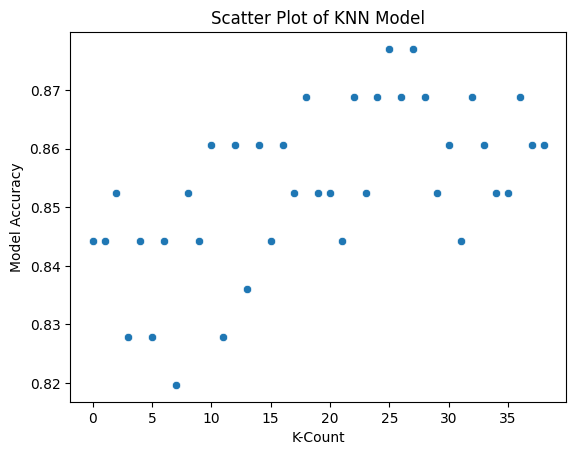

In [38]:
i = range(1,40) 
score = [] 

for k in i: 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(Xknn_train, yknn_train) 
    score.append(knn.score(Xknn_test, yknn_test)) 
   
sb.scatterplot(score) 
plt.xlabel('K-Count')
plt.ylabel('Model Accuracy')
plt.title('Scatter Plot of KNN Model')
plt.show()

The best K-valuee are 25 and 27, with a score of about 0.88 (see the sctterplot above)

Make predictions:

In [39]:
knn_pred = knn.predict(Xknn_test) 

print(knn_pred)

['High' 'High' 'Low' 'High' 'High' 'High' 'High' 'Low' 'High' 'Low' 'Low'
 'Low' 'Low' 'High' 'High' 'Low' 'High' 'High' 'High' 'High' 'Low' 'High'
 'High' 'Low' 'Low' 'Low' 'Low' 'High' 'Low' 'High' 'Low' 'High' 'Low'
 'High' 'Low' 'High' 'High' 'Low' 'Low' 'High' 'High' 'Low' 'Low' 'Low'
 'High' 'Low' 'Low' 'Low' 'High' 'High' 'Low' 'Low' 'Low' 'High' 'Low'
 'High' 'High' 'Low' 'Low' 'High' 'High' 'Low' 'Low' 'High' 'High' 'High'
 'High' 'High' 'High' 'Low' 'Low' 'High' 'Low' 'High' 'Low' 'High' 'Low'
 'High' 'Low' 'Low' 'High' 'Low' 'Low' 'Low' 'Low' 'High' 'Low' 'Low'
 'Low' 'Low' 'High' 'High' 'High' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'Low' 'Low' 'High'
 'High' 'Low' 'Low' 'High' 'Low' 'High' 'Low' 'High' 'Low' 'Low' 'High']


Confusion matrix:

In [40]:
knn_CM = confusion_matrix(yknn_test, knn_pred)
print ("KNN Confusion Matrix : \n", knn_CM)

KNN Confusion Matrix : 
 [[50 14]
 [ 3 55]]


Performance under K-Nearest Neighbour: 

 Accuracy = (TP+TN)/(TP+TN+FP+FN) = (50+55) / (50+55+14+3) = 105 / 122 = 0.8607 

Precision = TP/(TP+FP) = 50 / (50+14) = 50 / 64 = 0.7813

Recall = TP/(TP+FN) = 50 / (50+3) = 50 / 53 = 0.9434

### Data Analysis to answer Research Questions

What parts of Ontario have the strongest growth in ZEV registration?

In [43]:
dfWtdIncomePerSource.nlargest(5, ['EVGradient'])

,FSA,WtdEmploymentIncome,WtdPensionIncome,WtdSelfEmpIncome,WtdBenefitIncome,EVGradient
183,L6C,0.553367,0.116929,0.701627,0.298212,719.214286
137,L3R,0.516518,0.465038,0.662505,0.478577,623.357143
148,L4G,0.871128,0.383687,0.683059,0.347929,616.035714
147,L4E,0.685461,0.105755,0.831202,0.322312,603.571429
145,L4B,0.397504,0.204829,0.617393,0.232644,561.392857


Given economic outlook, what FSAs will be affected most in terms of new ZEV registrations?

In [44]:
dfWtdIncomePerSource.nlargest(5, ['WtdSelfEmpIncome'])

,FSA,WtdEmploymentIncome,WtdPensionIncome,WtdSelfEmpIncome,WtdBenefitIncome,EVGradient
298,M4V,0.440921,0.347221,1.000000,0.047806,216.214286
322,M6C,0.332768,0.145816,0.965665,0.228830,171.607143
324,M6G,0.395183,0.190317,0.959617,0.275810,152.035714
339,M9A,0.531873,0.386054,0.949265,0.261767,298.321429
333,M6S,0.592496,0.277846,0.928016,0.167655,278.250000
